In [1]:
import pandas as pd

#### Read and Load Developer Exchange Survery results and Schema

In [2]:
Survey_df = pd.read_csv("Downloads/developer_survey_2020/survey_results_public.csv")
Schema_df = pd.read_csv("Downloads/developer_survey_2020/survey_results_schema.csv")

In [3]:
Schema_df.set_index('Column',inplace=True) 
Schema_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


#### Q1 : Visualize All Respondents based on Developer Type

#### Part -1 :  Across all Regions 

#### Drop NaN value from Survery results

In [4]:
filt = Survey_df['DevType'].notna()
DevType_df = Survey_df.loc[filt]
DevType_df['DevType']

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
5          Designer;Developer, front-end;Developer, mobile
6        Developer, back-end;Developer, front-end;Devel...
7        Developer, back-end;Developer, desktop or ente...
                               ...                        
64448    Developer, back-end;Developer, desktop or ente...
64449                                    Developer, mobile
64451        Data scientist or machine learning specialist
64453    Data or business analyst;Developer, mobile;Sen...
64456                                  Senior executive/VP
Name: DevType, Length: 49370, dtype: object

#### Split the Developer Type based on ";" and count occurence of each

In [5]:
from collections import Counter
C = Counter()

for J in DevType_df['DevType']:
    C.update(J.split(';'))

In [6]:
Language =[]
Popularity =[]

for J in C.most_common():
   Language.append(J[0])
   Popularity.append(J[1])

Language.reverse()
Popularity.reverse() 

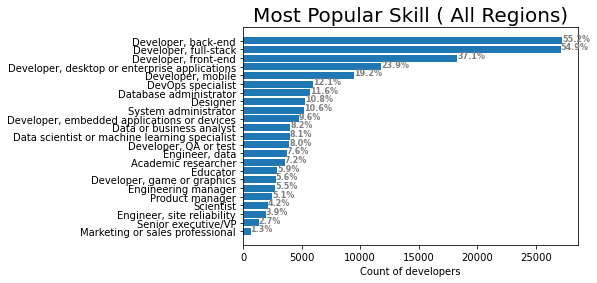

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plt.barh(Language,Popularity)
plt.xlabel("Count of developers") 
plt.title("Most Popular Skill ( All Regions)" , fontsize = 20)

total = len(DevType_df['DevType'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2 
        plt.text(x, y,percentage, 
             fontsize = 8, fontweight ='bold', 
             color ='grey')
        
plt.show()

#### Q1 Part -2 : For USA ( Unweighted )

In [8]:
filt = (Survey_df['Country']  == 'United States')  
DevType_df_USA = DevType_df.loc[filt]
DevType_df_USA

from collections import Counter
C = Counter()



In [9]:
for J in DevType_df_USA['DevType']:
    C.update(J.split(';'))
    
Language =[]
Popularity =[]
for J in C.most_common():
    Language.append(J[0])
    Popularity.append(J[1])
    
Language.reverse()
Popularity.reverse()

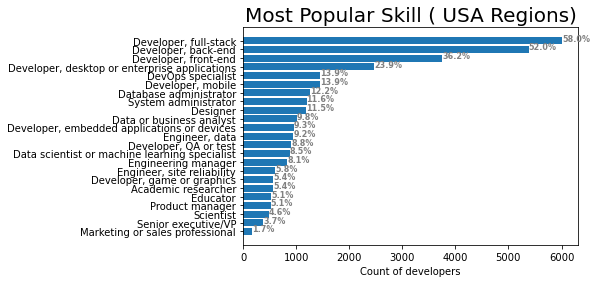

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plt.barh(Language,Popularity)
plt.xlabel("Count of developers") 
plt.title("Most Popular Skill ( USA Regions)" , fontsize = 20)

total = len(DevType_df_USA['DevType'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2 
        plt.text(x, y,percentage, 
             fontsize = 8, fontweight ='bold', 
             color ='grey')
        
plt.show()

#### Q2 : Visualize, how many respondants has Coding as a Hobby

In [11]:
Hobbyist_df = Survey_df.groupby('Hobbyist').count()
Hobbyist_df['Respondent']

Hobbyist
No     14028
Yes    50388
Name: Respondent, dtype: int64

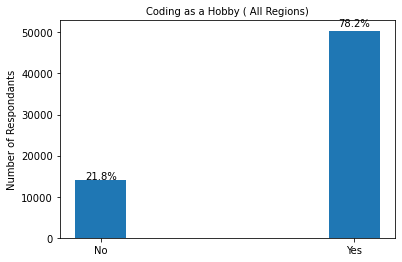

In [12]:
import matplotlib.pyplot as plt

width = .2
fig , ax = plt.subplots()

ax.bar(Hobbyist_df.index,Hobbyist_df['Respondent'],width)
ax.set_ylabel("Number of Respondants") 
plt.title ("Coding as a Hobby ( All Regions)" , fontsize = 10)

total =  Hobbyist_df['Respondent'].sum()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate('{:.1f}%'.format(100 * height/total) , (x + width/2, y + height*1.02), ha='center') 
    
plt.show()

#### Q3 : Visualize "Years of code " based on 5 years of bucketing

#### Part 1 : For all Respondent

#### Fetch the unique value of YearsCode attribute by droping NaN values

In [13]:
filt = Survey_df['YearsCode'].notna()
Lrn2cd_df = Survey_df.loc[filt]
Lrn2cd_df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', '24', '21', '12', '40', '27',
       '50', '46', '14', '18', '28', '32', '44', '26', '42', '31', '34',
       '29', '1', '39', '41', '45', 'More than 50 years', '47', '49',
       '48'], dtype=object)

#### Create a new attribute YearsCodeNew as Integer type by raplacing text values to respective Integer values functionally.

In [14]:
Lrn2cd_df['YearsCodeNew'] = Lrn2cd_df['YearsCode'].replace({'More than 50 years': '51' , 'Less than 1 year': '1'})
Lrn2cd_df['YearsCodeNew'] = Lrn2cd_df['YearsCodeNew'].astype(int)
Lrn2cd_df['YearsCodeNew'].unique()

<ipython-input-14-d6553bef811e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lrn2cd_df['YearsCodeNew'] = Lrn2cd_df['YearsCode'].replace({'More than 50 years': '51' , 'Less than 1 year': '1'})
<ipython-input-14-d6553bef811e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lrn2cd_df['YearsCodeNew'] = Lrn2cd_df['YearsCodeNew'].astype(int)


array([36,  7,  4, 15,  6, 17,  8, 10, 35,  5, 37, 19,  9, 22, 30, 23, 20,
        2,  1,  3, 13, 25, 16, 43, 11, 38, 33, 24, 21, 12, 40, 27, 50, 46,
       14, 18, 28, 32, 44, 26, 42, 31, 34, 29, 39, 41, 45, 51, 47, 49, 48])

#### Define a function to create Bucket based on YearsCode attribute

In [15]:
def year_of_coding(YearsCode): 
    
    YearsCodebin = ''
    
    if (( YearsCode < 5 )):
        YearsCodebin = 'Less Than 5 years'
    elif (( YearsCode >= 5 and YearsCode < 10 )):
        YearsCodebin = '5 to 9 years'
    elif (( YearsCode >= 10 and YearsCode < 15 )):
        YearsCodebin = '10 to 14 years'
    elif (( YearsCode >= 15 and YearsCode < 20 )):
        YearsCodebin = '15 to 19 years'
    elif (( YearsCode >= 20 and YearsCode < 25 )):
        YearsCodebin = '20 to 24 years'
    elif (( YearsCode >= 25 and YearsCode < 30 )):
        YearsCodebin = '25 to 29 years'
    elif (( YearsCode >= 30 and YearsCode < 35 )):
        YearsCodebin = '30 to 34 years'
    elif (( YearsCode >= 35 and YearsCode < 40 )):
        YearsCodebin = '35 to 39 years'
    elif (( YearsCode >= 40 and YearsCode < 45 )):
        YearsCodebin = '40 to 44 years'
    elif (( YearsCode >= 45 and YearsCode < 50 )):
        YearsCodebin = '45 to 49 years'
    elif (( YearsCode >= 50)):
        YearsCodebin = '50 years or More'
    
    return YearsCodebin

#### Create a new attribue that contains the bucketing of yearsCode 

In [16]:
Lrn2cd_df['YearsCodeBin'] = Lrn2cd_df['YearsCodeNew'].apply(year_of_coding)
Lrn2cd_df['YearsCodeBin'].unique()

<ipython-input-16-1a0e4c12db31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lrn2cd_df['YearsCodeBin'] = Lrn2cd_df['YearsCodeNew'].apply(year_of_coding)


array(['35 to 39 years', '5 to 9 years', 'Less Than 5 years',
       '15 to 19 years', '10 to 14 years', '20 to 24 years',
       '30 to 34 years', '25 to 29 years', '40 to 44 years',
       '50 years or More', '45 to 49 years'], dtype=object)

#### Aggregate on newly created Bucket column and display the graph

In [17]:
bins = ['Less Than 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years','35 to 39 years','40 to 44 years','45 to 49 years','50 years or More']
Lrn2cd_df_final = Lrn2cd_df.groupby('YearsCodeBin').count()['Respondent']
Lrn2cd_df_final

YearsCodeBin
10 to 14 years       11601
15 to 19 years        6592
20 to 24 years        4925
25 to 29 years        2543
30 to 34 years        2043
35 to 39 years        1547
40 to 44 years         922
45 to 49 years         235
5 to 9 years         17311
50 years or More       185
Less Than 5 years     9780
Name: Respondent, dtype: int64

#### Sort the dataframe in right order for better visualization 

In [18]:
Lrn2cd_df_final_sort = Lrn2cd_df_final.loc[['Less Than 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years','35 to 39 years','40 to 44 years','45 to 49 years','50 years or More']]
Lrn2cd_df_final_sort

YearsCodeBin
Less Than 5 years     9780
5 to 9 years         17311
10 to 14 years       11601
15 to 19 years        6592
20 to 24 years        4925
25 to 29 years        2543
30 to 34 years        2043
35 to 39 years        1547
40 to 44 years         922
45 to 49 years         235
50 years or More       185
Name: Respondent, dtype: int64

#### Plot the graph

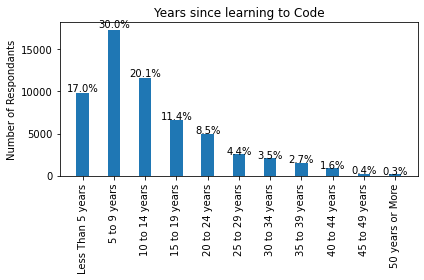

In [19]:
import matplotlib.pyplot as plt

width = .4
fig , ax = plt.subplots()

  
ax.bar(Lrn2cd_df_final_sort.index, Lrn2cd_df_final_sort.iloc[0:] ,width)
ax.set_ylabel("Number of Respondants") 
ax.set_xticklabels(Lrn2cd_df_final_sort.index,rotation='vertical') 
plt.title ( "Years since learning to Code")

total =  Lrn2cd_df_final_sort.sum()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate('{:.1f}%'.format(100 * height/total) , (x + width/2, y + height*1.02), ha='center') 

plt.tight_layout()
plt.show()

#### Part 2 : only for Professional Developers

#### Find out Right filters to distinguish Professional Developers

In [20]:
Lrn2cd_df['MainBranch'].unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

#### Create DF for Professional Develoeprs only

In [21]:
prof = ['I am a developer by profession','I am not primarily a developer, but I write code sometimes as part of my work']
filt = Lrn2cd_df['MainBranch'].isin(prof)
Lrn2cd_df_prof = Lrn2cd_df.loc[filt]

#### Aggregate and Sort profession developer DF based on "YearsCodeBin"

In [22]:
Lrn2cd_df_prof_final = Lrn2cd_df_prof.groupby('YearsCodeBin').count()['Respondent']
Lrn2cd_df_prof_final_sort = Lrn2cd_df_prof_final.loc[['Less Than 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years','35 to 39 years','40 to 44 years','45 to 49 years','50 years or More']]
Lrn2cd_df_prof_final_sort

YearsCodeBin
Less Than 5 years     5021
5 to 9 years         13955
10 to 14 years       10856
15 to 19 years        6324
20 to 24 years        4700
25 to 29 years        2420
30 to 34 years        1898
35 to 39 years        1441
40 to 44 years         842
45 to 49 years         188
50 years or More       134
Name: Respondent, dtype: int64

#### Plot the graph

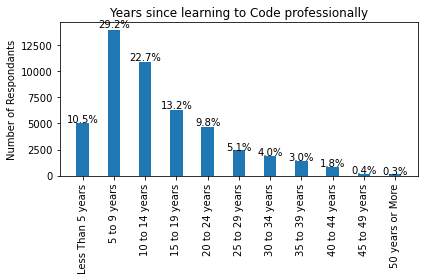

In [23]:
import matplotlib.pyplot as plt

width = .4
fig , ax = plt.subplots()

  
ax.bar(Lrn2cd_df_prof_final_sort.index, Lrn2cd_df_prof_final_sort.iloc[0:] ,width)
ax.set_ylabel("Number of Respondants") 
ax.set_xticklabels(Lrn2cd_df_prof_final_sort.index,rotation='vertical') 
plt.title ( "Years since learning to Code professionally")

total =  Lrn2cd_df_prof_final_sort.sum()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate('{:.1f}%'.format(100 * height/total) , (x + width/2, y + height*1.02), ha='center') 

plt.tight_layout()
plt.show()

#### Q4 : Visualize Number of Years Coding Professionally 

#### Create a new DF based on "YearsCodePro" attribute where value is not NaN

In [24]:
filt = Survey_df['YearsCodePro'].notna()
Lrn2cd_df_Pro = Survey_df.loc[filt]
Lrn2cd_df_Pro['YearsCodePro'].unique()

array(['27', '4', '8', '13', '2', '7', '20', '1', '23', '3', '12', '17',
       '18', '10', '14', '29', '6', '28', '9', '15', '11', '16', '25',
       'Less than 1 year', '5', '21', '19', '35', '24', '32', '22', '30',
       '38', '26', '40', '33', '31', 'More than 50 years', '34', '36',
       '39', '37', '41', '45', '47', '42', '46', '50', '43', '44', '48',
       '49'], dtype=object)

#### Apply right transformations to create a bucketing of years for "YearsCodePro" attribute

In [25]:
Lrn2cd_df_Pro['YearsCodeNew'] = Lrn2cd_df_Pro['YearsCodePro'].replace({'More than 50 years': '51' , 'Less than 1 year': '1'})
Lrn2cd_df_Pro['YearsCodeNew'] = Lrn2cd_df_Pro['YearsCodeNew'].astype(int)

Lrn2cd_df_Pro['YearsCodeBin'] = Lrn2cd_df_Pro['YearsCodeNew'].apply(year_of_coding)
Lrn2cd_df_Pro['YearsCodeBin'].unique()

<ipython-input-25-011969828d7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lrn2cd_df_Pro['YearsCodeNew'] = Lrn2cd_df_Pro['YearsCodePro'].replace({'More than 50 years': '51' , 'Less than 1 year': '1'})
<ipython-input-25-011969828d7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lrn2cd_df_Pro['YearsCodeNew'] = Lrn2cd_df_Pro['YearsCodeNew'].astype(int)
<ipython-input-25-011969828d7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

array(['25 to 29 years', 'Less Than 5 years', '5 to 9 years',
       '10 to 14 years', '20 to 24 years', '15 to 19 years',
       '35 to 39 years', '30 to 34 years', '40 to 44 years',
       '50 years or More', '45 to 49 years'], dtype=object)

#### Aggregate and Sort DF based on bucketing of years for "YearsCodePro" attribute

In [26]:
Lrn2cd_df_Pro_final = Lrn2cd_df_Pro.groupby('YearsCodeBin').count()['Respondent']
Lrn2cd_df_pro_final_sort = Lrn2cd_df_Pro_final.loc[['Less Than 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years','35 to 39 years','40 to 44 years','45 to 49 years','50 years or More']]
Lrn2cd_df_pro_final_sort

YearsCodeBin
Less Than 5 years    18337
5 to 9 years         12414
10 to 14 years        6804
15 to 19 years        3536
20 to 24 years        2781
25 to 29 years        1112
30 to 34 years         725
35 to 39 years         378
40 to 44 years         177
45 to 49 years          38
50 years or More        47
Name: Respondent, dtype: int64

#### plot the graph

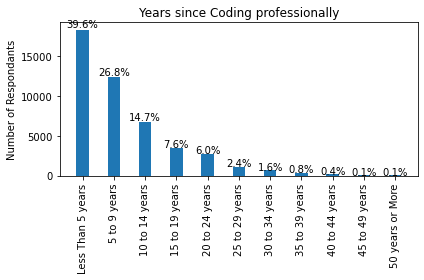

In [27]:
import matplotlib.pyplot as plt

width = .4
fig , ax = plt.subplots()

  
ax.bar(Lrn2cd_df_pro_final_sort.index, Lrn2cd_df_pro_final_sort.iloc[0:] ,width)
ax.set_ylabel("Number of Respondants") 
ax.set_xticklabels(Lrn2cd_df_pro_final_sort.index,rotation='vertical') 
plt.title ( "Years since Coding professionally")

total =  Lrn2cd_df_pro_final_sort.sum()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate('{:.1f}%'.format(100 * height/total) , (x + width/2, y + height*1.02), ha='center') 

plt.tight_layout()
plt.show()

#### Q5 : Visualize Years of Professional Coding Experience by Developer Type

#### Check Unique value of Developer Type

In [28]:
Lrn2cd_df_Pro['DevType'].unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Designer;Developer, desktop or enterprise applications;Developer, mobile;Product manager;Senior executive/VP;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Product manager;Scientist;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator'],
      dtype=object)

#### Perform Data clean up to eliminate rows having NaN value as part of DevType attribute and create a new DF

In [29]:
filt = (Lrn2cd_df_Pro['DevType'].notna())
Lrn2cd_df_Pro_DT = Lrn2cd_df_Pro.loc[filt]  

#### Find total Exp for each developer type

In [30]:
DevType_Df =  Lrn2cd_df_Pro_DT[['DevType','YearsCodeNew']]  

devType_exp =  {}

for i in  DevType_Df.itertuples() :
     
     for j in i[1].split(';'):
         if j in devType_exp.keys():
              experience = devType_exp[j]
              experience = experience + i[2]
              devType_exp[j] = experience
         else:
              devType_exp[j] = i[2]
                
devType_exp

{'Developer, desktop or enterprise applications': 118791,
 'Developer, full-stack': 220595,
 'Developer, mobile': 72554,
 'Designer': 45225,
 'Developer, front-end': 137989,
 'Developer, back-end': 227715,
 'Developer, QA or test': 32936,
 'DevOps specialist': 60496,
 'Developer, game or graphics': 21968,
 'Database administrator': 57422,
 'Developer, embedded applications or devices': 48118,
 'Engineer, data': 31466,
 'Educator': 27145,
 'System administrator': 51899,
 'Engineering manager': 35670,
 'Product manager': 27111,
 'Data or business analyst': 36094,
 'Academic researcher': 25169,
 'Data scientist or machine learning specialist': 29156,
 'Scientist': 18358,
 'Senior executive/VP': 20506,
 'Engineer, site reliability': 19171,
 'Marketing or sales professional': 5420}

#### Find total Number of Respondents for each developer type

In [31]:
from collections import Counter

DevTypeCount = Counter()

for j in Lrn2cd_df_Pro_DT['DevType'] :
    DevTypeCount.update(j.split(';'))

DevTypeCount

Counter({'Developer, desktop or enterprise applications': 11006,
         'Developer, full-stack': 25387,
         'Developer, mobile': 8611,
         'Designer': 4597,
         'Developer, front-end': 16817,
         'Developer, back-end': 25426,
         'Developer, QA or test': 3667,
         'DevOps specialist': 5756,
         'Developer, game or graphics': 2369,
         'Database administrator': 5286,
         'Developer, embedded applications or devices': 4410,
         'Engineer, data': 3439,
         'Educator': 2586,
         'System administrator': 4713,
         'Engineering manager': 2589,
         'Product manager': 2301,
         'Data or business analyst': 3602,
         'Academic researcher': 3077,
         'Data scientist or machine learning specialist': 3551,
         'Scientist': 1843,
         'Senior executive/VP': 1242,
         'Engineer, site reliability': 1822,
         'Marketing or sales professional': 518})

#### Find Avg Experience for each Developer Type

In [32]:
devType_Avgexp = {}
Avg_exp = 0

for j in DevTypeCount :
    
    Avg_exp = round((devType_exp[j]  / DevTypeCount[j]),1)
    devType_Avgexp[j] = Avg_exp

devType_Avgexp  

{'Developer, desktop or enterprise applications': 10.8,
 'Developer, full-stack': 8.7,
 'Developer, mobile': 8.4,
 'Designer': 9.8,
 'Developer, front-end': 8.2,
 'Developer, back-end': 9.0,
 'Developer, QA or test': 9.0,
 'DevOps specialist': 10.5,
 'Developer, game or graphics': 9.3,
 'Database administrator': 10.9,
 'Developer, embedded applications or devices': 10.9,
 'Engineer, data': 9.1,
 'Educator': 10.5,
 'System administrator': 11.0,
 'Engineering manager': 13.8,
 'Product manager': 11.8,
 'Data or business analyst': 10.0,
 'Academic researcher': 8.2,
 'Data scientist or machine learning specialist': 8.2,
 'Scientist': 10.0,
 'Senior executive/VP': 16.5,
 'Engineer, site reliability': 10.5,
 'Marketing or sales professional': 10.5}

#### Sort the dictionary in Decending order of exp

In [33]:
Sorted_devType_Avgexp = sorted(devType_Avgexp.items(), key=lambda x: x[1], reverse=False)
Sorted_devType_Avgexp

[('Developer, front-end', 8.2),
 ('Academic researcher', 8.2),
 ('Data scientist or machine learning specialist', 8.2),
 ('Developer, mobile', 8.4),
 ('Developer, full-stack', 8.7),
 ('Developer, back-end', 9.0),
 ('Developer, QA or test', 9.0),
 ('Engineer, data', 9.1),
 ('Developer, game or graphics', 9.3),
 ('Designer', 9.8),
 ('Data or business analyst', 10.0),
 ('Scientist', 10.0),
 ('DevOps specialist', 10.5),
 ('Educator', 10.5),
 ('Engineer, site reliability', 10.5),
 ('Marketing or sales professional', 10.5),
 ('Developer, desktop or enterprise applications', 10.8),
 ('Database administrator', 10.9),
 ('Developer, embedded applications or devices', 10.9),
 ('System administrator', 11.0),
 ('Product manager', 11.8),
 ('Engineering manager', 13.8),
 ('Senior executive/VP', 16.5)]

#### Plot the graph

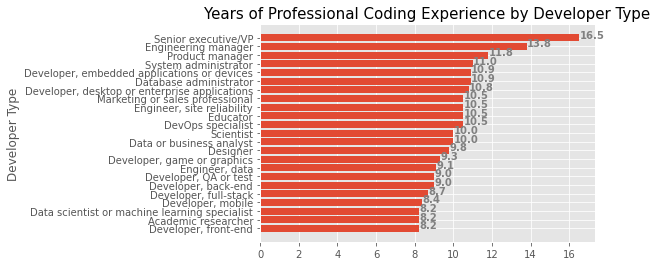

In [34]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

Dev_type = []
Avg_exp =[]

for i in Sorted_devType_Avgexp:
    Dev_type.append(i[0])
    Avg_exp.append(i[1])

fig, ax = plt.subplots()
ax = plt.barh(Dev_type,Avg_exp)
plt.ylabel("Developer Type") 
plt.title("Years of Professional Coding Experience by Developer Type" , fontsize = 15)


for p in ax.patches:
        avg_exp = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2 
        plt.text(x, y,avg_exp, 
             fontsize = 10, fontweight ='bold', 
             color ='grey')
        
plt.show()

#### Q6 : Visualize Most Loved, Dreaded, and Wanted Languages

##### Filter the records that has NaN as part of LanguageWorkedWith attribute

In [94]:
filt = Survey_df['LanguageWorkedWith'].notna()
Lang_df = Survey_df.loc[filt]

#### Create a Dict for all the languages that Respondents are working on currently and count the Respondents against each language

In [95]:
from collections import Counter

Lang_count = Counter()

for j in Lang_df['LanguageWorkedWith'] :
    Lang_count.update(j.split(';'))

Lang_count

Counter({'C#': 18041,
         'HTML/CSS': 36181,
         'JavaScript': 38822,
         'Swift': 3397,
         'Objective-C': 2340,
         'Python': 25287,
         'Ruby': 4046,
         'SQL': 31413,
         'Java': 23074,
         'PHP': 15007,
         'C': 12487,
         'TypeScript': 14578,
         'Bash/Shell/PowerShell': 18980,
         'Kotlin': 4468,
         'R': 3288,
         'VBA': 3499,
         'Perl': 1796,
         'Scala': 2052,
         'C++': 13707,
         'Go': 5038,
         'Haskell': 1222,
         'Rust': 2929,
         'Dart': 2280,
         'Julia': 519,
         'Assembly': 3553})

#### Create a Dict for all the languages that Respondents are working on currently and shows desire to work next year as well. Also count the Respondents against each language

#### Approcah 1 : using contains failed the test case as C# and C , Java & java script is taking consolidated count due to contains.
#### If tried handling it using de-limiter append logic in contains, its failing as well if a Language is in the end of concatenation

In [103]:
Lang_count_next = {} 

for key in Lang_count.keys():
      
      filt = (Survey_df['LanguageWorkedWith'].str.contains(key,regex=False) & Survey_df['LanguageDesireNextYear'].str.contains(key,regex=False))
      Lang_count_next[key] =  Survey_df.loc[filt]['LanguageWorkedWith'].count() 

Lang_count_next

{'C#': 10762,
 'HTML/CSS': 19356,
 'JavaScript': 22639,
 'Swift': 2021,
 'Objective-C': 547,
 'Python': 16858,
 'Ruby': 1734,
 'SQL': 17778,
 'Java': 28883,
 'PHP': 5591,
 'C': 31706,
 'TypeScript': 9786,
 'Bash/Shell/PowerShell': 10199,
 'Kotlin': 2811,
 'R': 6240,
 'VBA': 687,
 'Perl': 514,
 'Scala': 1092,
 'C++': 5954,
 'Go': 3137,
 'Haskell': 632,
 'Rust': 2523,
 'Dart': 1417,
 'Julia': 323,
 'Assembly': 1043}

#### Approach 2  :  fetch Most loved language by spliting each attribute "LanguageWorkedWith" &  "LanguageDesireNextYear" into an array per respondent and validate if  a given language is present in each array to have exact match

In [120]:
import numpy as np

Lang_count_next = {} 
Lang_loved_df =  Lang_df[['LanguageWorkedWith','LanguageDesireNextYear']]  
filt = Lang_loved_df['LanguageDesireNextYear'].notna()
Lang_loved_df = Lang_loved_df.loc[filt]

for key in Lang_count.keys():
        
        count = 0 
        for i in  Lang_loved_df.itertuples() :
             
             LanguageWorkedWith = []
             LanguageDesireNextYear=[]
 
             for j in i[1].split(';'):
                 
                 LanguageWorkedWith.append(j)
                
              
             for k in i[2].split(';'):
                        
                 LanguageDesireNextYear.append(k)
            
             if (key in LanguageWorkedWith) and (key in LanguageDesireNextYear):
                
                 count = count + 1
         
        Lang_count_next[key] = count


Lang_count_next

{'C#': 10762,
 'HTML/CSS': 19356,
 'JavaScript': 22639,
 'Swift': 2021,
 'Objective-C': 547,
 'Python': 16858,
 'Ruby': 1734,
 'SQL': 17778,
 'Java': 10177,
 'PHP': 5591,
 'C': 4130,
 'TypeScript': 9786,
 'Bash/Shell/PowerShell': 10199,
 'Kotlin': 2811,
 'R': 1462,
 'VBA': 687,
 'Perl': 514,
 'Scala': 1092,
 'C++': 5954,
 'Go': 3137,
 'Haskell': 632,
 'Rust': 2523,
 'Dart': 1417,
 'Julia': 323,
 'Assembly': 1043}

#### Calculate Loved pct based on Lang_count & Lang_count_next Dict

In [126]:
Most_loved_language = {}
Loved_pct = 0

for j in Lang_count :
    
    Loved_pct = round(( (Lang_count_next[j] ) / Lang_count[j]),3)
    Most_loved_language[j] = round(Loved_pct * 100, 1)

Most_loved_language  

{'C#': 59.7,
 'HTML/CSS': 53.5,
 'JavaScript': 58.3,
 'Swift': 59.5,
 'Objective-C': 23.4,
 'Python': 66.7,
 'Ruby': 42.9,
 'SQL': 56.6,
 'Java': 44.1,
 'PHP': 37.3,
 'C': 33.1,
 'TypeScript': 67.1,
 'Bash/Shell/PowerShell': 53.7,
 'Kotlin': 62.9,
 'R': 44.5,
 'VBA': 19.6,
 'Perl': 28.6,
 'Scala': 53.2,
 'C++': 43.4,
 'Go': 62.3,
 'Haskell': 51.7,
 'Rust': 86.1,
 'Dart': 62.1,
 'Julia': 62.2,
 'Assembly': 29.4}

In [127]:
Most_loved_language_sorted = sorted(Most_loved_language.items(), key=lambda x: x[1], reverse=False)
Most_loved_language_sorted 

[('VBA', 19.6),
 ('Objective-C', 23.4),
 ('Perl', 28.6),
 ('Assembly', 29.4),
 ('C', 33.1),
 ('PHP', 37.3),
 ('Ruby', 42.9),
 ('C++', 43.4),
 ('Java', 44.1),
 ('R', 44.5),
 ('Haskell', 51.7),
 ('Scala', 53.2),
 ('HTML/CSS', 53.5),
 ('Bash/Shell/PowerShell', 53.7),
 ('SQL', 56.6),
 ('JavaScript', 58.3),
 ('Swift', 59.5),
 ('C#', 59.7),
 ('Dart', 62.1),
 ('Julia', 62.2),
 ('Go', 62.3),
 ('Kotlin', 62.9),
 ('Python', 66.7),
 ('TypeScript', 67.1),
 ('Rust', 86.1)]

#### Plot the graph

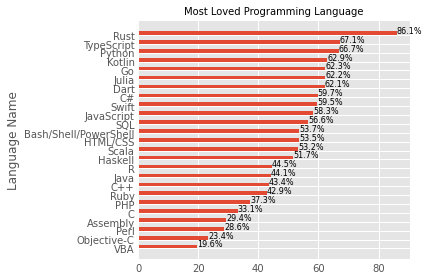

In [169]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

Lang_name = []
Loved_pct =[]
width = 0.4

for i in Most_loved_language_sorted:
    Lang_name.append(i[0])
    Loved_pct.append(i[1])

fig, ax = plt.subplots()
ax = plt.barh(range( len(Lang_name) ),Loved_pct,width,align='edge' )
plt.ylabel("Language Name") 
plt.yticks(range(len(Lang_name) ), Lang_name)
plt.title("Most Loved Programming Language" , fontsize = 10)

for p in ax.patches:
        pct = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2 
        plt.text(x, y,'{:.1f}%'.format(pct), 
             fontsize = 8,  
             color ='black')

plt.tight_layout()
plt.show()